# QUIMB Visuals

This notebook creates visuals used in the presentation.

In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn

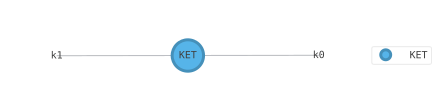

In [2]:
data = qu.bell_state('psi-').reshape(2, 2)
inds = ('k0', 'k1')
tags = ('KET',)

ket = qtn.Tensor(data=data, inds=inds, tags=tags)
ket.draw('KET')

In [3]:
type(ket)

quimb.tensor.tensor_core.Tensor

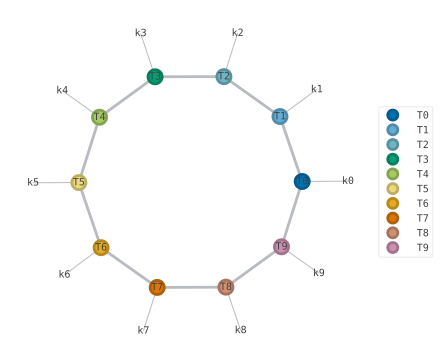

In [4]:
L = 10

# create the nodes, by default just the scalar 1.0
tensors = [qtn.Tensor(tags=f'T{i}') for i in range(L)]

for i in range(L):
    # add the physical indices, each of size 2
    tensors[i].new_ind(f'k{i}', size=2)
    
    # add bonds between neighbouring tensors, of size 7
    tensors[i].new_bond(tensors[(i + 1) % L], size=7)
    
mps = qtn.TensorNetwork(tensors)
mps.draw([f'T{i}' for i in range(L)])

In [5]:
type(mps)

quimb.tensor.tensor_core.TensorNetwork

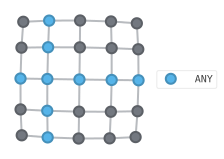

In [6]:
tn = qtn.TN2D_rand(5, 5, D=4)
tn.select(tags=['X2', 'Y3'], which='any').add_tag('ANY')
tn.draw('ANY', figsize=(3, 3))

In [7]:
type(tn)

quimb.tensor.tensor_2d.TensorNetwork2D

In [8]:
from tebd.matrix_product_states import MatrixProductState

In [10]:
mps = MatrixProductState(d=2, N=5, bond_dim=10)

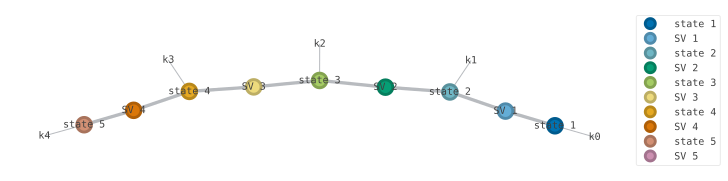

In [18]:
qtn.TensorNetwork(mps.data).draw(
    ['state 1', 'SV 1', 'state 2', 'SV 2', 'state 3', 'SV 3', 'state 4', 'SV 4', 'state 5', 'SV 5'],
    figsize=(10, 10)
)